In [2]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline
from datetime import date as d
from datetime import time as t
from datetime import datetime as dt
import scipy
from scipy.stats.stats import pearsonr
from scipy.stats.stats import spearmanr 
rcParams['figure.figsize'] = 15,7
sb.set_style('whitegrid', )
sb.set(style = 'ticks', color_codes=True)

In [3]:
co2 = pd.read_csv('Fuel Consumption Ratings95_99.csv', nrows = 1000)

In [4]:
co2.head()
co2.columns = ['Year', 'Make', 'Model', 'Class', 'Engine_Size', 'Cylinders', 'Transmission', 'Fuel', 'FC_City', 'FC_HWY', 'COMB(l/100Km)', 'COMb(mpg)', 'Emissions(g/Km)']

In [5]:
co2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
Year               1000 non-null int64
Make               1000 non-null object
Model              1000 non-null object
Class              1000 non-null object
Engine_Size        1000 non-null float64
Cylinders          1000 non-null int64
Transmission       1000 non-null object
Fuel               1000 non-null object
FC_City            1000 non-null float64
FC_HWY             1000 non-null float64
COMB(l/100Km)      1000 non-null float64
COMb(mpg)          1000 non-null int64
Emissions(g/Km)    1000 non-null int64
dtypes: float64(4), int64(4), object(5)
memory usage: 101.6+ KB


In [6]:
co2.columns

Index(['Year', 'Make', 'Model', 'Class', 'Engine_Size', 'Cylinders',
       'Transmission', 'Fuel', 'FC_City', 'FC_HWY', 'COMB(l/100Km)',
       'COMb(mpg)', 'Emissions(g/Km)'],
      dtype='object')

In [7]:
#co2.isna().sum()

In [8]:
co2.fillna(method='ffill', inplace=True)

In [9]:
#co2.info()

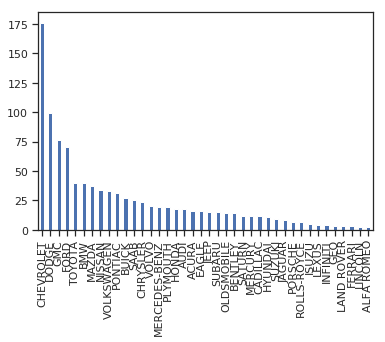

In [10]:
co2['Make'].value_counts().plot(kind='bar')

In [10]:
# df['MAKE'] = df['MAKE'].astype('category')
# df['MODEL'] = df['MODEL'].astype('category')
# df['VEHICLE CLASS'] = df['VEHICLE CLASS'].astype('category')
# df['ENGINE SIZE'] = df['ENGINE SIZE'].astype('category')
# df['CYLINDERS'] = df['CYLINDERS'].astype('category')


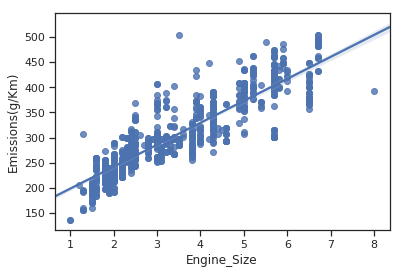

In [42]:
#plt.scatter(co2['Engine_Size'] , co2['Emissions(g/Km)'])
sb.regplot('Engine_Size','Emissions(g/Km)', data= co2, scatter=True)

In [12]:
co2[co2['Engine_Size'] == 8]

,Year,Make,Model,Class,Engine_Size,Cylinders,Transmission,Fuel,FC_City,FC_HWY,COMB(l/100Km),COMb(mpg),Emissions(g/Km)
268,1995,DODGE,VIPER RT/10,TWO-SEATER,8.0,10,M6,Z,21.4,11.8,17.1,17,393


In [13]:
co2['Emissions(g/Km)'].max()
co2['Emissions(g/Km)'].min()

136

In [14]:
co2[co2['Emissions(g/Km)'] == 504]

,Year,Make,Model,Class,Engine_Size,Cylinders,Transmission,Fuel,FC_City,FC_HWY,COMB(l/100Km),COMb(mpg),Emissions(g/Km)
24,1995,BENTLEY,LIMOUSINE,FULL-SIZE,6.7,8,A4,Z,25.3,17.8,21.9,13,504
287,1995,FERRARI,F355 BERLINETTA/GTS,TWO-SEATER,3.5,8,M6,Z,26.1,16.8,21.9,13,504
686,1995,ROLLS-ROYCE,SILVER SPUR III LIMOUSINE,FULL-SIZE,6.7,8,A4,Z,25.3,17.8,21.9,13,504


In [15]:
co2[co2['Emissions(g/Km)'] == 136]

,Year,Make,Model,Class,Engine_Size,Cylinders,Transmission,Fuel,FC_City,FC_HWY,COMB(l/100Km),COMb(mpg),Emissions(g/Km)
358,1995,GEO,METRO,SUBCOMPACT,1.0,3,M5,X,6.5,5.2,5.9,48,136
648,1995,PONTIAC,FIREFLY,SUBCOMPACT,1.0,3,M5,X,6.5,5.2,5.9,48,136


/home/adesope/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/adesope/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


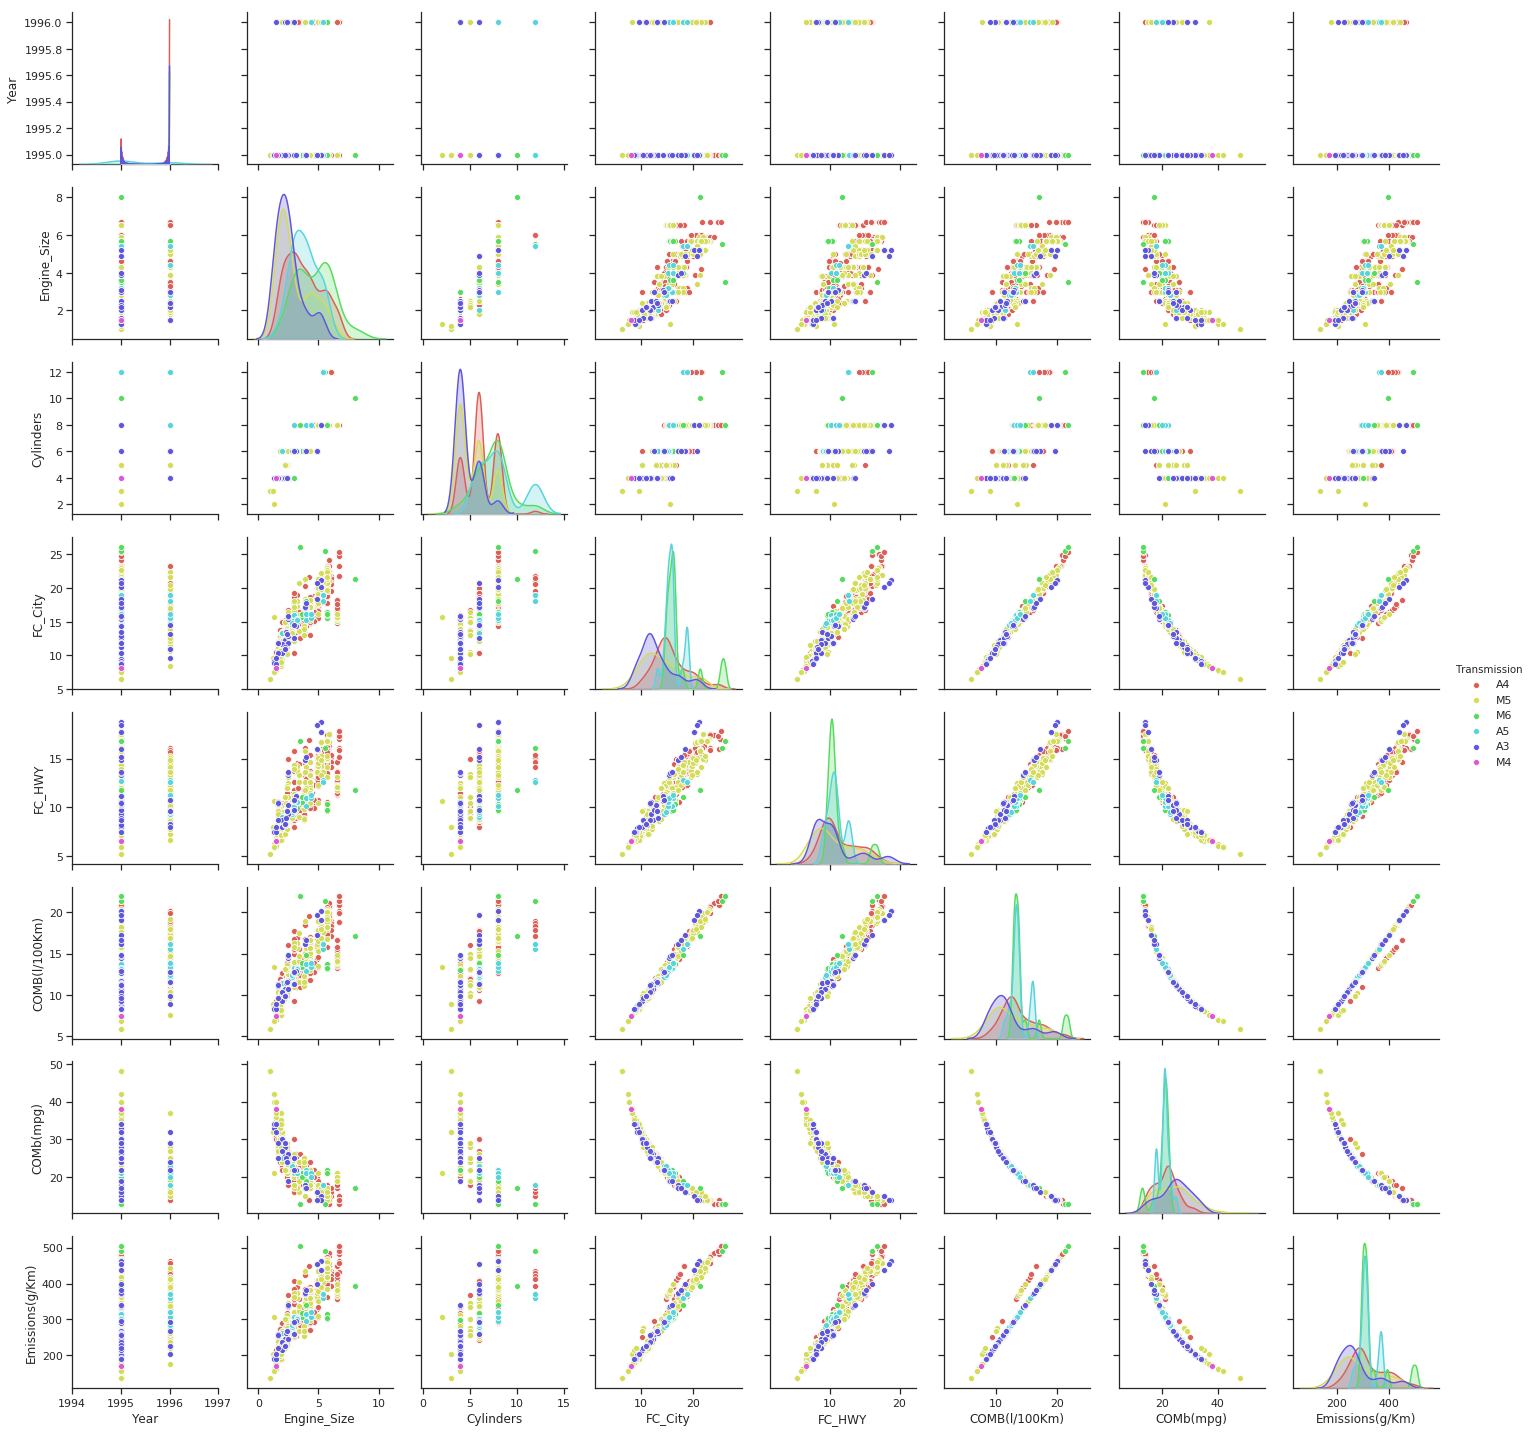

In [13]:
sb.pairplot(co2, hue='Transmission', palette='hls')

(array([  8.,  64., 138., 217., 209.,  96., 110.,  79.,  57.,  22.]),
 array([136. , 172.8, 209.6, 246.4, 283.2, 320. , 356.8, 393.6, 430.4,
        467.2, 504. ]),
 <a list of 10 Patch objects>)

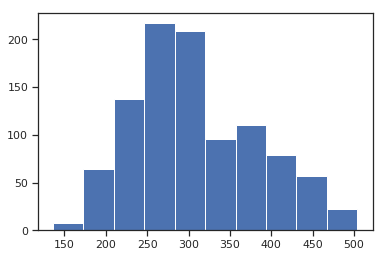

In [17]:
plt.hist(co2['Emissions(g/Km)'])

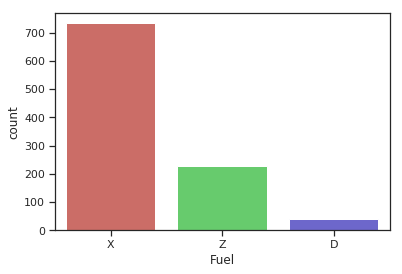

In [47]:
sb.countplot('Fuel', data=co2, palette='hls')

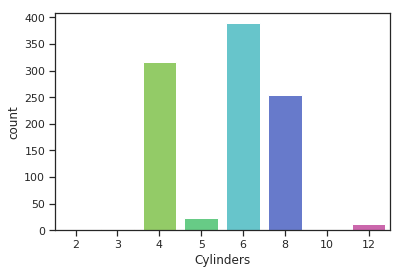

In [48]:
sb.countplot('Cylinders', data=co2, palette='hls')

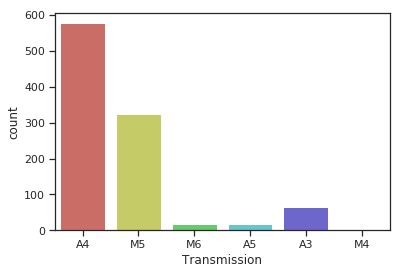

In [49]:
sb.countplot('Transmission', data=co2, palette='hls')

# Regression

In [41]:
import sklearn
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn import metrics
from collections import Counter

co2.columns

Index(['Year', 'Make', 'Model', 'Class', 'Engine_Size', 'Cylinders',
       'Transmission', 'Fuel', 'FC_City', 'FC_HWY', 'COMB(l/100Km)',
       'COMb(mpg)', 'Emissions(g/Km)'],
      dtype='object')

In [21]:
df_reg = co2[['Year','Engine_Size','Cylinders','Transmission', 'Fuel', 'FC_City', 'FC_HWY', 'COMB(l/100Km)','COMb(mpg)', 'Emissions(g/Km)']]

In [24]:
df_reg.corr()

,Year,Engine_Size,Cylinders,FC_City,FC_HWY,COMB(l/100Km),COMb(mpg),Emissions(g/Km)
Year,1.000000,0.099256,0.089216,0.040960,-0.021416,0.017104,-0.050505,0.010678
Engine_Size,0.099256,1.000000,0.888871,0.859115,0.799653,0.847261,-0.815422,0.879377
Cylinders,0.089216,0.888871,1.000000,0.804063,0.720041,0.781932,-0.762874,0.796963
FC_City,0.040960,0.859115,0.804063,1.000000,0.945966,0.991966,-0.949673,0.977588
FC_HWY,-0.021416,0.799653,0.720041,0.945966,1.000000,0.979233,-0.923384,0.974774
COMB(l/100Km),0.017104,0.847261,0.781932,0.991966,0.979233,1.000000,-0.951855,0.989365
COMb(mpg),-0.050505,-0.815422,-0.762874,-0.949673,-0.923384,-0.951855,1.000000,-0.943657
Emissions(g/Km),0.010678,0.879377,0.796963,0.977588,0.974774,0.989365,-0.943657,1.000000


In [30]:
# Although the varaibles co-corellate we go ahead to use them to demonstrate linear regression 
df_reg[df_reg.isnull()].sum()

Year               0.0
Engine_Size        0.0
Cylinders          0.0
Transmission       0.0
Fuel               0.0
FC_City            0.0
FC_HWY             0.0
COMB(l/100Km)      0.0
COMb(mpg)          0.0
Emissions(g/Km)    0.0
dtype: float64

In [35]:
x,y = scale(df_reg[['Engine_Size','Cylinders', 'FC_City', 'FC_HWY', 'COMB(l/100Km)','COMb(mpg)']]), df_reg['Emissions(g/Km)']

/home/adesope/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  """Entry point for launching an IPython kernel.


In [39]:
reg = LinearRegression(normalize=True)
reg.fit(x,y)
reg.score(x,y)

0.9879073289661087

# Logistic Regression

In [60]:
x_log,y_log = scale(df_reg[['Engine_Size','Cylinders', 'FC_City', 'FC_HWY','COMB(l/100Km)','COMb(mpg)','Emissions(g/Km)']]), df_reg['Fuel']

/home/adesope/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  """Entry point for launching an IPython kernel.


In [61]:
reg_lg = LogisticRegression()
reg_lg.fit(x_log,y_log)
#reg_lg.score(x_log,y_log)

/home/adesope/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/adesope/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [65]:
from sklearn.metrics import classification_report
y_pred_log = reg_lg.predict(x_log)
print(classification_report(y_log,y_pred_log))

              precision    recall  f1-score   support

           D       1.00      0.82      0.90        40
           X       0.79      0.98      0.88       733
           Z       0.77      0.18      0.29       227

   micro avg       0.79      0.79      0.79      1000
   macro avg       0.85      0.66      0.69      1000
weighted avg       0.79      0.79      0.74      1000

